# Sparse Cross-Encoder (4-4096)

This jupyter notebook shows how to run the [4-4096 edition of the sparse cross-encoder](https://arxiv.org/pdf/2312.17649.pdf).

The notebook is intended to be executed in the [associated dev-container](https://github.com/webis-de/ecir24-sparse-cross-encoder/blob/main/.devcontainer.json) and is also the notebook that we executed in [TIREx](http://tira.io/tirex) that you either can start locally (e.g., using VSCode + Docker/Podman) or using the free tier of Github Codespaces (120h free per month for standard accounts).

To start it in Github Codespaces, please click on "Code" -> "Codespaces" in the github repository:

![github codespace]( 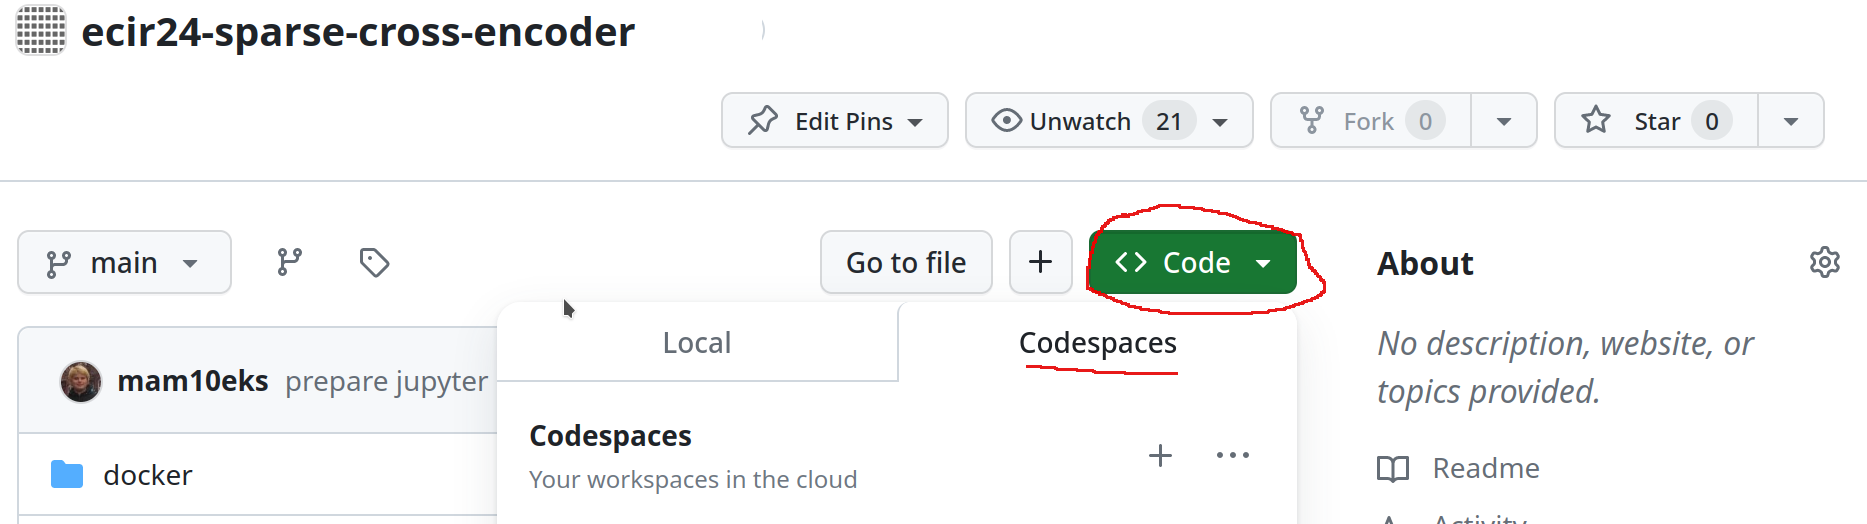)

This notebook runs on a small customizable hello world example if executed outside of TIRA/TIREx, and processes the injected data if executed within TIRA/TIREx.

### Step 1: Configure Inputs/Outputs

In [1]:
import pandas as pd
import os

input_dataset = "/tmp/rerank.jsonl.gz"
output_file = "/tmp/run.txt"

if os.environ.get('TIRA_INPUT_DATASET', None):
    # We are inside the TIRA sandbox, we process the injected dataset
    input_dataset = os.environ.get('TIRA_INPUT_DATASET') + '/rerank.jsonl.gz'
    output_file = os.environ.get('TIRA_OUTPUT_DIR') + '/run.txt'
else:
    # We are outside the TIRA sandbox, we process a small cunstructed hello world example
    scored_docs = pd.DataFrame([
        {"qid": "1", "query": "hubble telescope achievements", "docno": "doc-3", "text": "The Hubble telescope discovered two moons of Pluto, Nix and Hydra.", "rank": 1, "score": 10},
        {"qid": "1", "query": "hubble telescope achievements", "docno": "doc-4", "text": "Edwin Hubble, an astronomer with great achievement, completely reimagined our place in the universe (the telescope is named by him).", "rank": 2, "score": 9},
        {"qid": "2", "query": "how to exit vim?", "docno": "doc-1", "text": "Press ESC key, then the : (colon), and type the wq command after the colon and hit the Enter key to save and leave Vim.", "rank": 1, "score": 10},
        {"qid": "2", "query": "how to exit vim?", "docno": "doc-2", "text": "In Vim, you can always press the ESC key on your keyboard to enter the normal mode in the Vim editor.", "rank": 2, "score": 9},
        {"qid": "3", "query": "signs heart attack", "docno": "doc-5", "text": "Common heart attack symptoms include: (1) Chest pain, (2) Pain or discomfort that spreads to the shoulder, arm, back, neck, jaw, teeth or sometimes the upper belly, etc.", "rank": 1, "score": 10},
        {"qid": "3", "query": "signs heart attack", "docno": "doc-6", "text": "A heart attack happens when the flow of blood that brings oxygen to your heart muscle suddenly becomes blocked. ", "rank": 2, "score": 9},
    ])
    scored_docs.to_json(input_dataset, lines=True, orient='records')


### Step 2: Run the Sparse Cross-Encoder

In [2]:
print('We re-rank the following scored documents:')
!ls -lha {input_dataset}

We re-rank the following scored documents:
-rw-r--rw- 1 root root 590 Jan  4 18:04 /tmp/rerank.jsonl.gz


In [3]:
!python3 /workspaces/ecir24-sparse-cross-encoder/main.py \
    predict --config /workspaces/ecir24-sparse-cross-encoder/sparse_cross_encoder/configs/cli/predict.yaml \
    --model.model_name_or_path webis/sparse-cross-encoder-4-4096 \
    --data.max_length 4096 \
    --data.ir_dataset_path {input_dataset} --trainer.callbacks.output_path {output_file}

/opt/conda/lib/python3.10/site-packages/lightning/fabric/utilities/seed.py:40: UserWarning: No seed found, seed set to 583073042
  rank_zero_warn(f"No seed found, seed set to {seed}")
Global seed set to 583073042
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Predicting DataLoader 0: 100%|████████████████████| 2/2 [00:00<00:00,  7.82it/s]


### Step 3: look into the results

In [4]:
print('Re-Ranking is done. first 5 results are:')
!ls -lha {output_file}
!head -5 {output_file}

Re-Ranking is done. first 5 results are:
-rw-r--rw- 1 root root 311 Jan  4 18:05 /tmp/run.txt
1	0	doc-4	1	3.4655117988586426	sparse_cross_encoder
1	0	doc-3	2	0.15354369580745697	sparse_cross_encoder
2	0	doc-1	1	3.656857490539551	sparse_cross_encoder
2	0	doc-2	2	3.003075122833252	sparse_cross_encoder
3	0	doc-5	1	4.5715742111206055	sparse_cross_encoder
